In [1]:
# Install Libraries
!pip install tensorflow keras opencv-python scikit-learn matplotlib

#Import Libraries

In [2]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image dimensions
IMG_SIZE = 224
BATCH_SIZE = 32

# Path to the dataset
dataset_path = r'C:\Users\kethu\Videos\garbage_classification'

# Categories (classes) of garbage (optional, for reference)
categories = ['battery', 'biological', 'brown-glass', 'cardboard', 'clothes', 'green-glass',
              'metal', 'paper', 'plastic', 'shoes', 'trash', 'white-glass']

# Apply data augmentation to the training data
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize the images
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.2  # Split the data into 80% training and 20% validation
)

test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Create the training generator with augmentation
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_SIZE, IMG_SIZE),  # Resize all images to 224x224
    batch_size=BATCH_SIZE,
    class_mode='sparse',  
    subset='training' 
)

# Create the validation generator without augmentation
validation_generator = test_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_SIZE, IMG_SIZE),  
    batch_size=BATCH_SIZE,
    class_mode='sparse', 
    subset='validation' 
)

# Shape of the training and validation batches
print(f"Training data: {train_generator.samples} samples")
print(f"Validation data: {validation_generator.samples} samples")


Found 12415 images belonging to 12 classes.
Found 3100 images belonging to 12 classes.
Training data: 12415 samples
Validation data: 3100 samples


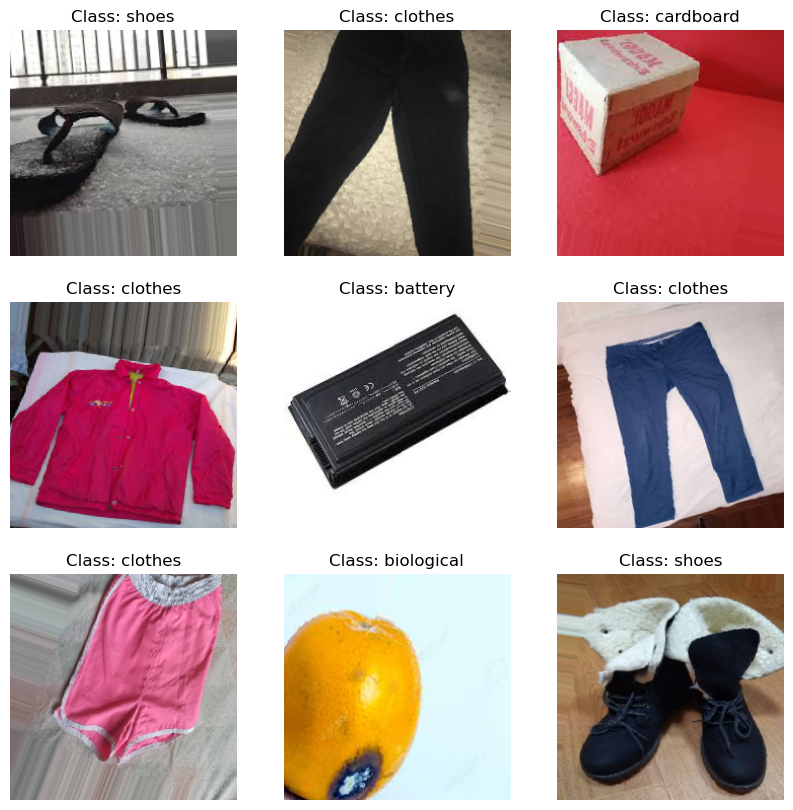

In [4]:
# Display some augmented images
augmented_images, augmented_labels = next(train_generator)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i])
    plt.title(f"Class: {categories[int(augmented_labels[i])]}")
    plt.axis('off')
plt.show()